<a href="https://colab.research.google.com/github/Rimshay/PANDAS/blob/main/PANDAS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Wargling (Join)

=> # => (inner, outer, left, right)

=> df.join()

=> df.merge()

=> pd.concat()

Group by

=> df.groupby(by)

=> unstact

=> pivot_Table

Handling Missing Values

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.DataFrame({"CNIC": np.random.randint(1,20, size=20),
                   "Account No":np.random.randint(1,5, size=(20))})

df1.drop_duplicates(inplace=True)
df1
#12345-1234567-3
#1234512345673

,CNIC,Account No
0,3,4
1,8,1
2,5,3
3,10,3
4,6,4
5,5,2
6,3,3
7,16,4
9,3,1
10,10,2


In [3]:
df2 = pd.DataFrame({"CNIC": np.random.randint(1,20, size=(20)),
                   "Account No":np.random.randint(1,5, size=(20)),
                   "Mobile No":np.random.randint(2001,3000, size=(20)),
                  "DOB":pd.date_range('1990-01-01', periods=20, freq="M"),
                  "CustomerName":[chr(x) for x in np.random.randint(65,91, size=(20))],
                   "Gender":np.random.choice(["M","F"], size=(20))})
df2

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,8,3,2845,1990-01-31,U,M
1,6,4,2698,1990-02-28,K,M
2,2,4,2158,1990-03-31,U,M
3,13,3,2964,1990-04-30,M,M
4,11,2,2514,1990-05-31,J,M
5,15,1,2575,1990-06-30,A,M
6,12,3,2016,1990-07-31,B,F
7,9,2,2487,1990-08-31,I,M
8,8,1,2926,1990-09-30,A,M
9,2,3,2636,1990-10-31,A,M


In [4]:
df2.columns[np.in1d(df2.columns,df1.columns)]

Index(['CNIC', 'Account No'], dtype='object')

In [5]:
df2[df2.CNIC==4]

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender


In [6]:
print(df1.dtypes, df2.dtypes, sep="\n\n\n")

CNIC          int64
Account No    int64
dtype: object


CNIC                     int64
Account No               int64
Mobile No                int64
DOB             datetime64[ns]
CustomerName            object
Gender                  object
dtype: object


columnNameSameInBothDataframes Name(optional), datatype, data_pattern

data_frame_left.merge(dataframe_right, on="columnNameSameInBothDataframes", how="typeofJoin")
typeofJoin=inner,outer,left,right
data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")
data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")

if columns name differents in both table

data_frame_left.merge(dataframe_right, left_on="col", right_on="col", how="typeofJoin")

data_frame_left.merge(dataframe_right, left_index=True, right_index=True, how='outer')

data_frame_left.merge(dataframe_right, on="columnNameSameInBothDataframes", how="typeofJoin")

In [7]:
a = df1.merge(df2, on="CNIC", how='inner')
print(len(df1))
print(len(df2))
print(len(a))
a

17
20
16


,CNIC,Account No_x,Account No_y,Mobile No,DOB,CustomerName,Gender
0,8,1,3,2845,1990-01-31,U,M
1,8,1,1,2926,1990-09-30,A,M
2,8,3,3,2845,1990-01-31,U,M
3,8,3,1,2926,1990-09-30,A,M
4,6,4,4,2698,1990-02-28,K,M
5,6,4,3,2818,1991-07-31,E,M
6,16,4,3,2597,1991-02-28,Q,F
7,16,1,3,2597,1991-02-28,Q,F
8,11,2,2,2514,1990-05-31,J,M
9,11,2,2,2586,1991-03-31,D,M


**data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")**

In [8]:
a = df1.merge(df2, on=["CNIC","Account No"], how="inner") #Join with multiples columns
print(len(df1))
print(len(df2))
print(len(a))
a

17
20
6


,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,8,1,2926,1990-09-30,A,M
1,6,4,2698,1990-02-28,K,M
2,11,2,2514,1990-05-31,J,M
3,11,2,2586,1991-03-31,D,M
4,8,3,2845,1990-01-31,U,M
5,9,3,2099,1990-12-31,T,M


**data_frame_left.merge(dataframe_right, left_on="col", right_on="col", how="typeofJoin")**

In [9]:
df1.columns

Index(['CNIC', 'Account No'], dtype='object')

In [10]:
df1.columns = ['Customer CNIC', 'Customer Account No']
df1.head(2)

,Customer CNIC,Customer Account No
0,3,4
1,8,1


In [11]:
df2.head(2)

,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,8,3,2845,1990-01-31,U,M
1,6,4,2698,1990-02-28,K,M


In [12]:
a = df1.merge(df2, left_on="Customer CNIC", right_on="CNIC")
a

,Customer CNIC,Customer Account No,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,8,1,8,3,2845,1990-01-31,U,M
1,8,1,8,1,2926,1990-09-30,A,M
2,8,3,8,3,2845,1990-01-31,U,M
3,8,3,8,1,2926,1990-09-30,A,M
4,6,4,6,4,2698,1990-02-28,K,M
5,6,4,6,3,2818,1991-07-31,E,M
6,16,4,16,3,2597,1991-02-28,Q,F
7,16,1,16,3,2597,1991-02-28,Q,F
8,11,2,11,2,2514,1990-05-31,J,M
9,11,2,11,2,2586,1991-03-31,D,M


In [13]:
a = df1.merge(df2, left_on=["Customer CNIC","Customer Account No"], right_on=["CNIC","Account No"])
a

,Customer CNIC,Customer Account No,CNIC,Account No,Mobile No,DOB,CustomerName,Gender
0,8,1,8,1,2926,1990-09-30,A,M
1,6,4,6,4,2698,1990-02-28,K,M
2,11,2,11,2,2514,1990-05-31,J,M
3,11,2,11,2,2586,1991-03-31,D,M
4,8,3,8,3,2845,1990-01-31,U,M
5,9,3,9,3,2099,1990-12-31,T,M


In [14]:
a[["CNIC","CustomerName","Mobile No"]]

,CNIC,CustomerName,Mobile No
0,8,A,2926
1,6,K,2698
2,11,J,2514
3,11,D,2586
4,8,U,2845
5,9,T,2099


**data_frame_left.merge(dataframe_right, left_index=True, right_index=True, how='outer')**

In [15]:
customers = pd.DataFrame({"Customers NIC": [14,6,19,22],"Customer Name":["A","B","C","D"]})


transactions = pd.DataFrame({"CNIC": np.random.choice([14,6,19,21], size=(20)),
                   "TransactionID":np.random.randint(1,2, size=(20)),
                  "Transaction Date":pd.date_range('1990-01-01', periods=20, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(20)),
                            "Amount":np.random.randint(1,1000000, size=(20))})


customers

,Customers NIC,Customer Name
0,14,A
1,6,B
2,19,C
3,22,D


In [16]:
transactions

,CNIC,TransactionID,Transaction Date,Description,Amount
0,6,1,1990-01-31,FT,202557
1,19,1,1990-02-28,TopUP,490988
2,19,1,1990-03-31,IBFT,569471
3,14,1,1990-04-30,FT,656360
4,19,1,1990-05-31,IBFT,603416
5,6,1,1990-06-30,FT,359903
6,21,1,1990-07-31,TopUP,915632
7,21,1,1990-08-31,FT,878409
8,6,1,1990-09-30,TopUP,896513
9,21,1,1990-10-31,IBFT,614893


In [17]:
def fee_charges(x):
  if x>=1 and x<=100000:
    return 10
  elif x>100000 and x<=1000000:
    return 50
  else:
    return 100

transactions['fee'] = transactions.Amount.apply(fee_charges)
transactions

,CNIC,TransactionID,Transaction Date,Description,Amount,fee
0,6,1,1990-01-31,FT,202557,50
1,19,1,1990-02-28,TopUP,490988,50
2,19,1,1990-03-31,IBFT,569471,50
3,14,1,1990-04-30,FT,656360,50
4,19,1,1990-05-31,IBFT,603416,50
5,6,1,1990-06-30,FT,359903,50
6,21,1,1990-07-31,TopUP,915632,50
7,21,1,1990-08-31,FT,878409,50
8,6,1,1990-09-30,TopUP,896513,50
9,21,1,1990-10-31,IBFT,614893,50


In [18]:
c = transactions.CNIC.value_counts()
print(c.index)
print(c.values)
print()
print(c)

Int64Index([19, 6, 14, 21], dtype='int64')
[7 6 4 3]

19    7
6     6
14    4
21    3
Name: CNIC, dtype: int64


In [19]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='left')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a.sort_values(by=["Transaction counts"], ascending=False, inplace=True)
a

,Customers NIC,Customer Name,Transaction counts
2,19,C,7.0
1,6,B,6.0
0,14,A,4.0
3,22,D,NaN


In [20]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='right')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

,Customers NIC,Customer Name,Transaction counts
2.0,19,C,7
1.0,6,B,6
0.0,14,A,4
NaN,21,NaN,3


In [21]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='inner')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

,Customers NIC,Customer Name,Transaction counts
0,14,A,4
1,6,B,6
2,19,C,7


In [22]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='outer')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

,Customers NIC,Customer Name,Transaction counts
0.0,14,A,4.0
1.0,6,B,6.0
2.0,19,C,7.0
3.0,22,D,NaN
NaN,21,NaN,3.0


**Slabs**

pd.cut(series)

pd.qcut(series)

In [23]:
transactions.head(2)

,CNIC,TransactionID,Transaction Date,Description,Amount,fee
0,6,1,1990-01-31,FT,202557,50
1,19,1,1990-02-28,TopUP,490988,50


In [24]:
slabs = [1,10000,50000,100000,500000,99000000]
pd.cut(transactions.Amount,slabs).value_counts()

(500000, 99000000]    14
(100000, 500000]       6
(1, 10000]             0
(10000, 50000]         0
(50000, 100000]        0
Name: Amount, dtype: int64

In [25]:
slabs = [0, 0.6, 0.8, .95, 1]
pd.qcut(transactions.Amount,slabs).value_counts()

(202556.999, 644620.4]    12
(644620.4, 782896.0]       4
(782896.0, 897468.95]      3
(897468.95, 915632.0]      1
Name: Amount, dtype: int64

**Group by**

In [26]:
#dataframeName.groupby("Col").agg([count])             optional(min,max,avg,sum, std)(int,float)
#dataframeName.groupby(by="Col")[["colname"]].agg([count]) 
#dataframeName.groupby(by=[col1,col2,..]).agg([count]) 

In [27]:
transactions = pd.DataFrame({"CNIC": np.random.choice([14,6,19,21], size=(20)),
                   "TransactionID":np.random.randint(1,2, size=(20)),
                  "Transaction Date":pd.date_range('1990-01-01', periods=20, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(20)),
                            "Amount":np.random.randint(1,1000000, size=(20)),
                            "City":np.random.choice(["Karachi","Islamabad","Lahore"], size=(20))})



transactions

,CNIC,TransactionID,Transaction Date,Description,Amount,City
0,21,1,1990-01-31,TopUP,298075,Karachi
1,21,1,1990-02-28,IBFT,110062,Karachi
2,21,1,1990-03-31,TopUP,353362,Islamabad
3,6,1,1990-04-30,FT,936230,Islamabad
4,19,1,1990-05-31,FT,171956,Karachi
5,6,1,1990-06-30,TopUP,22313,Islamabad
6,21,1,1990-07-31,IBFT,317629,Islamabad
7,14,1,1990-08-31,TopUP,481284,Karachi
8,19,1,1990-09-30,FT,287667,Lahore
9,6,1,1990-10-31,FT,850089,Lahore


In [28]:
a = transactions.groupby("City").agg(['count'])
a

,CNIC,TransactionID,Transaction Date,Description,Amount
,count,count,count,count,count
City,,,,,
Islamabad,7,7,7,7,7
Karachi,8,8,8,8,8
Lahore,5,5,5,5,5


In [29]:
a = transactions.groupby("City")[["CNIC"]].agg(['count'])
a

,CNIC
,count
City,
Islamabad,7
Karachi,8
Lahore,5


In [30]:
a = transactions.groupby("City")[["City"]].agg(['count'])
a

,City
,count
City,
Islamabad,7
Karachi,8
Lahore,5


In [31]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std])
a

count     min     max           mean            std
City      Description                                                     
Islamabad FT               2  296452  936230  616341.000000  452391.362254
          IBFT             3  317629  908496  572981.333333  303480.563935
          TopUP            2   22313  353362  187837.500000  234086.992805
Karachi   FT               3  171956  780516  387134.333333  341179.775790
          IBFT             2  110062  381884  245973.000000  192207.179476
          TopUP            3  298075  782284  520547.666667  244480.705906
Lahore    FT               2  287667  850089  568878.000000  397692.410089
          IBFT             1   99036   99036   99036.000000            NaN
          TopUP            2   34679  385601  210140.000000  248139.325868

In [32]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std,'sum']).reset_index()
a = a.sort_values(by=["City",'count'], ascending=[True,False])
a.to_excel("output.xlsx", index=False)

In [33]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std]).unstack()
a

count                min                     max                  \
Description    FT IBFT TopUP      FT    IBFT   TopUP      FT    IBFT   TopUP   
City                                                                           
Islamabad       2    3     2  296452  317629   22313  936230  908496  353362   
Karachi         3    2     3  171956  110062  298075  780516  381884  782284   
Lahore          2    1     2  287667   99036   34679  850089   99036  385601   

                      mean                                          std  \
Description             FT           IBFT          TopUP             FT   
City                                                                      
Islamabad    616341.000000  572981.333333  187837.500000  452391.362254   
Karachi      387134.333333  245973.000000  520547.666667  341179.775790   
Lahore       568878.000000   99036.000000  210140.000000  397692.410089   

                                           
Description           IBFT          TopUP  
City                                       
Islamabad    303480.563935  234086.992805  
Karachi      192207.179476  244480.705906  
Lahore                 NaN  248139.325868

Categorical data/nominal data 'orange','mango'

ordinal data 1,3,2,4 (discreate/countinues) A,B,C a,b,c i,ii,iii

In [34]:
a = input("Enter no")
a.split(",")

Enter no33


['33']

In [35]:
list(str('232'))

['2', '3', '2']

In [36]:
transactions.groupby([transactions['Transaction Date'].dt.year, "City","CNIC"]).agg(['count'])

TransactionID Transaction Date Description  \
                                        count            count       count   
Transaction Date City      CNIC                                              
1990             Islamabad 6                3                3           3   
                           21               2                2           2   
                 Karachi   14               1                1           1   
                           19               1                1           1   
                           21               2                2           2   
                 Lahore    6                2                2           2   
                           19               1                1           1   
1991             Islamabad 14               1                1           1   
                           21               1                1           1   
                 Karachi   6                2                2           2   
                           21               2                2           2   
                 Lahore    19               1                1           1   
                           21               1                1           1   

                                Amount  
                                 count  
Transaction Date City      CNIC         
1990             Islamabad 6         3  
                           21        2  
                 Karachi   14        1  
                           19        1  
                           21        2  
                 Lahore    6         2  
                           19        1  
1991             Islamabad 14        1  
                           21        1  
                 Karachi   6         2  
                           21        2  
                 Lahore    19        1  
                           21        1

In [37]:
transactions.head()

,CNIC,TransactionID,Transaction Date,Description,Amount,City
0,21,1,1990-01-31,TopUP,298075,Karachi
1,21,1,1990-02-28,IBFT,110062,Karachi
2,21,1,1990-03-31,TopUP,353362,Islamabad
3,6,1,1990-04-30,FT,936230,Islamabad
4,19,1,1990-05-31,FT,171956,Karachi


count           
Description    FT IBFT TopUP
City                        
Islamabad       2    3     2
Karachi         3    2     3
Lahore          2    1     2

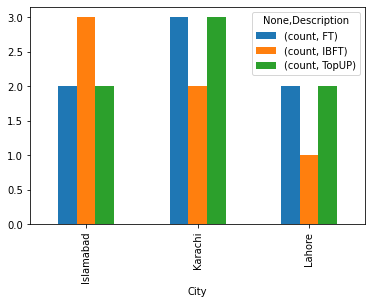

In [38]:
a = transactions.groupby(["City","Description"]).\
TransactionID.agg(['count']).unstack()

a.plot(kind='bar')
a

In [39]:
b = transactions.pivot_table(index="City", columns="Description", aggfunc=["count",'sum'])
b

count                                                         \
            Amount            CNIC            Transaction Date              
Description     FT IBFT TopUP   FT IBFT TopUP               FT IBFT TopUP   
City                                                                        
Islamabad        2    3     2    2    3     2                2    3     2   
Karachi          3    2     3    3    2     3                3    2     3   
Lahore           2    1     2    2    1     2                2    1     2   

                           ...            sum                              \
            TransactionID  ...         Amount                   CNIC        
Description            FT  ... TopUP       FT     IBFT    TopUP   FT IBFT   
City                       ...                                              
Islamabad               2  ...     2  1232682  1718944   375675   27   41   
Karachi                 3  ...     3  1161403   491946  1561643   46   27   
Lahore                  2  ...     2  1137756    99036   420280   25   19   

                                            
                  TransactionID             
Description TopUP            FT IBFT TopUP  
City                                        
Islamabad      27             2    3     2  
Karachi        56             3    2     3  
Lahore         27             2    1     2  

[3 rows x 21 columns]